In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib as plt
import seaborn as sb


In [4]:
%matplotlib inline

In [18]:
lll= pd.read_csv('./lll5.csv', skipinitialspace=True, low_memory=False)
ng= pd.read_csv('./ng5.csv', skipinitialspace=True, low_memory=False)
rtn=pd.read_csv('./rtn.csv', skipinitialspace=True, low_memory=False)

In [19]:
lll['Date'] = pd.to_datetime(lll['Date'])  ##tell pandas its a date
lll.set_index('Date', inplace=True)
ng['Date'] = pd.to_datetime(ng['Date'])  ##tell pandas its a date
ng.set_index('Date', inplace=True)
rtn['Date'] = pd.to_datetime(rtn['Date'])  ##tell pandas its a date
rtn.set_index('Date', inplace=True)
lll['Year'] = lll.index.year
ng['Month'] = ng.index.month
ng['Year'] = ng.index.year
lll['Month'] = lll.index.month
rtn['Year'] = rtn.index.year
rtn['Month'] = rtn.index.month

In [20]:
lll.head(2)

,Open,High,Low,Close,Volume,Year,Month
Date,,,,,,,
2017-06-30,166.61,167.66,166.22,167.08,612166,2017,6
2017-06-29,168.04,168.71,164.34,166.05,509650,2017,6


In [24]:
dns=pd.concat([lll, ng, rtn])
dns= dns.groupby(dns.index).mean()

In [25]:
dns.head(2)

,Close,High,Low,Month,Open,Volume,Year
Date,,,,,,,
2012-07-03,64.960000,65.083333,64.410000,7.0,64.570000,685262.666667,2012.0
2012-07-05,64.646667,64.963333,64.406667,7.0,64.606667,906531.000000,2012.0


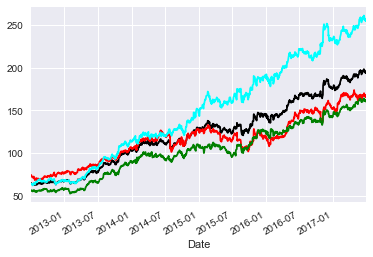

In [22]:
ax=dns['Close'].plot(color='black')
lll['Close'].plot(ax=ax, color='red')
ng['Close'].plot(ax=ax, color='cyan')
rtn['Close'].plot(ax=ax, color='green')


In [24]:
lll['abspc_change']=(abs((lll['Open'] - lll['Close'])/lll['Open'] ))*100
lll['change']=(lll['Open'] - lll['Close'])
lll['pc_change']=(lll['Open'] - lll['Close'])/lll['Open']*100

ng['abspc_change']=(abs((ng['Open'] - ng['Close'])/ng['Open'] ))*100
ng['change']=(ng['Open'] - ng['Close'])
ng['pc_change']=(ng['Open'] - ng['Close'])/ng['Open']*100

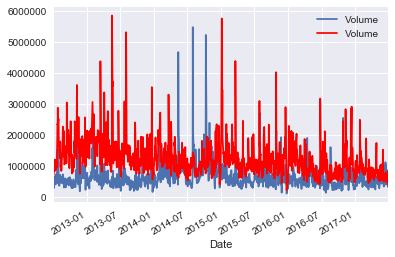

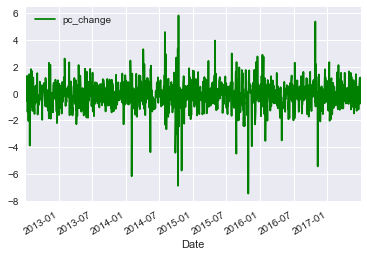

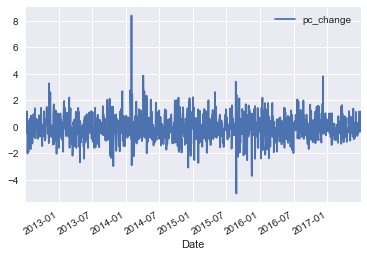

In [25]:
ax=lll[['Volume']].plot()  ###defense company 1
ng[['Volume']].plot(ax=ax, color="red")  ###defense company 2
ax2=lll[['pc_change']].plot( color='green')


#ng[['Volume']].plot(ax=ax)  ###defense company 2
ng[['pc_change']].plot()

AttributeError: 'RangeIndex' object has no attribute 'year'

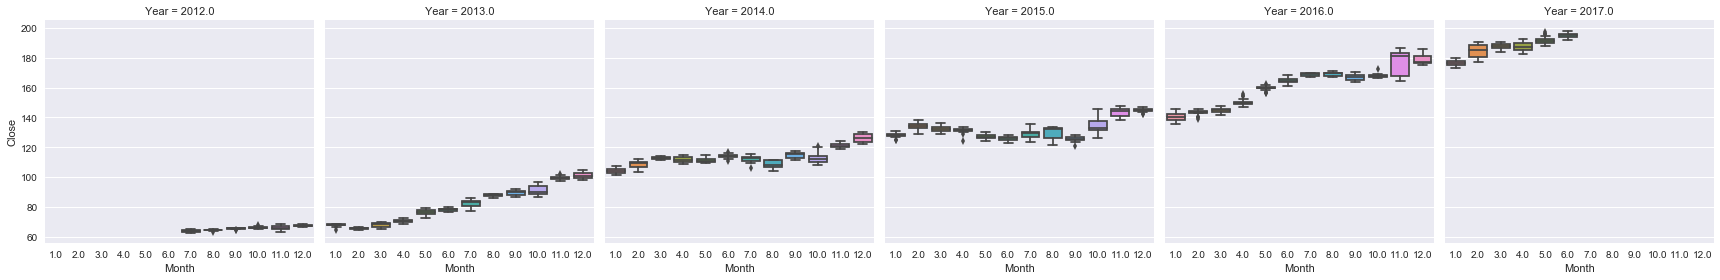

In [27]:
sb.factorplot(
    col='Year',
    x='Month',
    y='Close',
    data=dns,
    kind='box',
    
)
